# Case Convolutional Nets

In [ ]:
!pip install -q Keras

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical


Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
def plot_images(images, labels):
    fig, axes = plt.subplots(5,5)
    fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
    
    for i,ax in zip(np.random.choice(range(images.shape[0]),25),axes.flat):
        ax.imshow(images[i].reshape(28,28),cmap='binary')
        ax.set_xlabel('label :{}'.format(labels[i]))
        ax.set_xticks([])
        ax.set_yticks([])

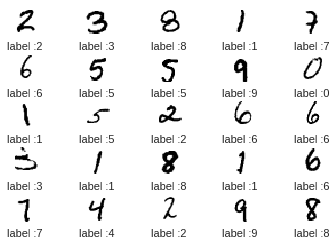

In [6]:
plot_images(X_train,y_train)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 30
img_rows, img_cols = 28, 28

In [8]:
X_train = X_train.reshape((X_train.shape[0], img_rows , img_cols, 1))
X_test =  X_test.reshape((X_test.shape[0] , img_rows , img_cols, 1))


# Scale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train images : {}'.format(X_train.shape))
print('Test images : {}'.format(X_test.shape))
print('Train labels : {}'.format(y_train.shape))
print('Test labes : {}'.format(y_test.shape))

Train images : (60000, 28, 28, 1)
Test images : (10000, 28, 28, 1)
Train labels : (60000, 10)
Test labes : (10000, 10)


# Model

In [9]:
input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(32, (3,3), 
                 activation='relu', 
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu',
                padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compute loss and update
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(lr=0.5),
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
__________

In [10]:
model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs,
          verbose=1,)

Epoch 1/30
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3653 - acc: 0.8840
Epoch 2/30
36096/60000 [=================>............] - ETA: 30s - loss: 0.1085 - acc: 0.968060000/60000 [==============================] - 77s 1ms/step - loss: 0.1040 - acc: 0.9695
Epoch 3/30
58496/60000 [============================>.] - ETA: 1s - loss: 0.0807 - acc: 0.975960000/60000 [==============================] - 77s 1ms/step - loss: 0.0813 - acc: 0.9757
Epoch 4/30
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0699 - acc: 0.9789
Epoch 5/30
 5504/60000 [=>............................] - ETA: 1:10 - loss: 0.0598 - acc: 0.982660000/60000 [==============================] - 77s 1ms/step - loss: 0.0604 - acc: 0.9820
Epoch 6/30
44416/60000 [=====================>........] - ETA: 20s - loss: 0.0561 - acc: 0.982360000/60000 [==============================] - 77s 1ms/step - loss: 0.0575 - acc: 0.9825
Epoch 7/30
60000/60000 [==============================] - 77s 1m

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022168594618202087
Test accuracy: 0.9931
